<a href="https://www.kaggle.com/code/mh0386/logistic-regression?scriptVersionId=129440850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib.pyplot import plot as plt
import sys

# Standardization

In [2]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Prediction

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(X, W, B):
    pred = sigmoid(np.dot(X, W) + B)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

# Cost Function

In [5]:
def cost(y, y_hat):
    return np.mean(-y * np.log(y_hat + sys.float_info.min) - (1 - y) * np.log(1 - y_hat + sys.float_info.min))

# Train

In [6]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Train with L1 Regularization

In [7]:
def train_L1(X, y, learning_rate, epochs, Lambda):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * (dW + Lambda * np.sign(W))
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Mini_Batch Gradient Descent

In [8]:
def train_mini_batch(X, y, learning_rate, epochs, batch_size):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        for j in range(0, len(X), batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            y_hat = predict(X_batch, W, B)
            dW = np.dot(X_batch.T, (y_hat - y_batch)) / len(X_batch)
            db = np.mean(y_hat - y_batch)
            W -= learning_rate * dW
            B -= learning_rate * db
            if i % 100 == 0:
                costValue: float = cost(y, y_hat)
                costs = np.append(costs, costValue)
                print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# RMS Prop

In [9]:
def train_rms_prop(X, y, learning_rate, epochs, beta, epsilon = sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta * vW + (1 - beta) * dW ** 2
        vB = beta * vB + (1 - beta) * dB ** 2
        W -= learning_rate * dW / (np.sqrt(vW) + epsilon)
        B -= learning_rate * dB / (np.sqrt(vB) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Adam

In [10]:
def train_adam(X, y, learning_rate, epochs, beta1, beta2, epsilon = sys.float_info.min):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    vW = np.zeros(X.shape[1])
    vB = 0
    sW = np.zeros(X.shape[1])
    sB = 0
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        dB = np.mean(y_hat - y)
        vW = beta1 * vW + (1 - beta1) * dW
        vB = beta1 * vB + (1 - beta1) * dB
        sW = beta2 * sW + (1 - beta2) * dW ** 2
        sB = beta2 * sB + (1 - beta2) * dB ** 2
        vW_corrected = vW / (1 - beta1 ** (i + 1))
        vB_corrected = vB / (1 - beta1 ** (i + 1))
        sW_corrected = sW / (1 - beta2 ** (i + 1))
        sB_corrected = sB / (1 - beta2 ** (i + 1))
        W -= learning_rate * vW_corrected / (np.sqrt(sW_corrected) + epsilon)
        B -= learning_rate * vB_corrected / (np.sqrt(sB_corrected) + epsilon)
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Test

In [11]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

# Accuracy

In [12]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Loading the data

In [13]:
trainSet, testSet = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Get class 0 and class 1

In [14]:
xTrain = trainSet[0].astype('float32')
yTrain = trainSet[1].astype('int32')

xTest = testSet[0].astype('float32')
yTest = testSet[1].astype('int32')

xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTest = xTest.reshape(xTest.shape[0], -1)

xTrain = np.concatenate([xTrain[yTrain == 0], xTrain[yTrain == 1]])
yTrain = np.concatenate([yTrain[yTrain == 0], yTrain[yTrain == 1]])

xTest = np.concatenate([xTest[yTest == 0], xTest[yTest == 1]])
yTest = np.concatenate([yTest[yTest == 0], yTest[yTest == 1]])

xTrain = standardize(xTrain)
xTest = standardize(xTest)

p = np.random.permutation(len(xTrain))
p2 = np.random.permutation(len(xTest))

xTrain = xTrain[p]
yTrain = yTrain[p]

xTest = xTest[p2]
yTest = yTest[p2]

k = 10
iterations = 1000

# K-Fold Cross-Validation

In [15]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        x_valid = X[i * fold_size:(i + 1) * fold_size]
        y_valid = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(x_valid, y_valid, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs, w, b

# Running Code

## At Learning Rate 0.1

----------K-Fold Cross Validation with 10 Folds and eta 0.1----------

Training at Iteration 1 of 10
Cost at epoch 0: 668.3125787258502
Cost at epoch 100: 14.169171280406724
Cost at epoch 200: 7.14673112827532
Cost at epoch 300: 4.909493557684785
Cost at epoch 400: 3.977311236605395
Cost at epoch 500: 3.4180018439577617
Cost at epoch 600: 3.0451289155260057
Cost at epoch 700: 2.547965010950332
Cost at epoch 800: 2.2372375705905347
Cost at epoch 900: 2.2372375705905347

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.995260663507109

Training at Iteration 2 of 10
Cost at epoch 0: 643.3922380089946
Cost at epoch 100: 14.107025792334762
Cost at epoch 200: 6.8360036879155235
Cost at epoch 300: 4.847348069612826
Cost at epoch 400: 4.101602212749314
Cost at epoch 500: 3.480147332029721
Cost at epoch 600: 3.169419891669925
Cost at epoch 700: 2.6722559870942497
Cost at epoch 800: 2.423674034806413
Cost at epoch 900: 1.9886556183026975

Testing at Iteration 2 of 10
Accuracy at Ite

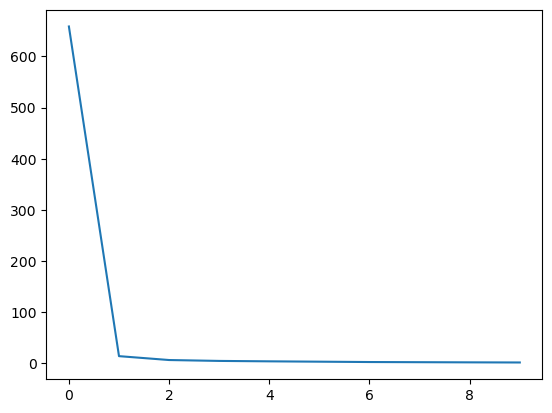

In [16]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.1----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.1, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.01

----------K-Fold Cross Validation with 10 Folds and eta 0.01----------

Training at Iteration 1 of 10
Cost at epoch 0: 653.521952564724
Cost at epoch 100: 169.40860048416104
Cost at epoch 200: 74.57458568635116
Cost at epoch 300: 45.55264275674617
Cost at epoch 400: 34.30430941572154
Cost at epoch 500: 27.34401475166209
Cost at epoch 600: 22.496666682049266
Cost at epoch 700: 19.45153776652326
Cost at epoch 800: 17.7114641005084
Cost at epoch 900: 15.90924494642158

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.9794628751974723

Training at Iteration 2 of 10
Cost at epoch 0: 659.6743558838479
Cost at epoch 100: 165.49343473562763
Cost at epoch 200: 70.03796505709813
Cost at epoch 300: 45.11762434024246
Cost at epoch 400: 31.56990794055533
Cost at epoch 500: 25.293213645287437
Cost at epoch 600: 21.378047896754
Cost at epoch 700: 18.70579190965975
Cost at epoch 800: 16.21997238678138
Cost at epoch 900: 14.417753232694556

Testing at Iteration 2 of 10
Accuracy at Iteratio

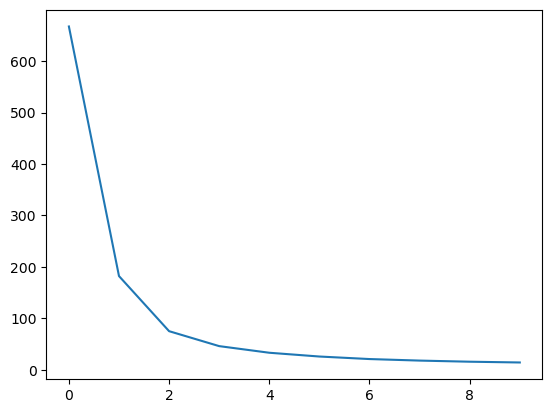

In [17]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.01, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.001

----------K-Fold Cross Validation with 10 Folds and eta 0.001----------

Training at Iteration 1 of 10
Cost at epoch 0: 653.7083890289397
Cost at epoch 100: 622.4492085287443
Cost at epoch 200: 575.8400924747748
Cost at epoch 300: 513.8188953789595
Cost at epoch 400: 439.8657645733279
Cost at epoch 500: 365.78834279155245
Cost at epoch 600: 306.37725619475935
Cost at epoch 700: 258.6495213554946
Cost at epoch 800: 219.6221548463042
Cost at epoch 900: 191.59453972585055

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.7606635071090048

Training at Iteration 2 of 10
Cost at epoch 0: 654.3919893977313
Cost at epoch 100: 622.0141901122405
Cost at epoch 200: 570.7441624528742
Cost at epoch 300: 501.4519432526395
Cost at epoch 400: 421.0978271755962
Cost at epoch 500: 349.568370404771
Cost at epoch 600: 292.5188123547124
Cost at epoch 700: 245.22609593195136
Cost at epoch 800: 210.98393200430186
Cost at epoch 900: 180.28406089675394

Testing at Iteration 2 of 10
Accuracy at Ite

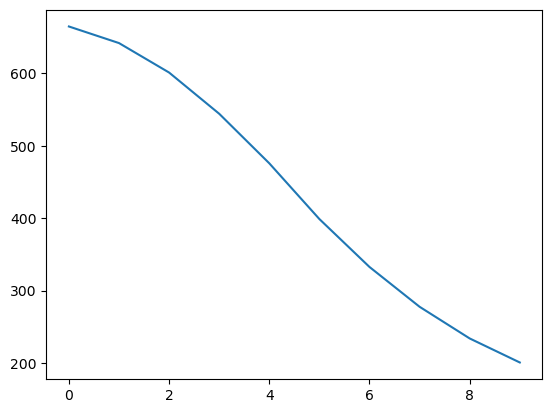

In [18]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.0001

----------K-Fold Cross Validation with 10 Folds and eta 0.0001----------

Training at Iteration 1 of 10
Cost at epoch 0: 658.5557370985526
Cost at epoch 100: 656.3806450160341
Cost at epoch 200: 653.8326800050837
Cost at epoch 300: 651.4090059702772
Cost at epoch 400: 649.0474774235429
Cost at epoch 500: 645.629475579585
Cost at epoch 600: 642.2736192236993
Cost at epoch 700: 639.2284903081734
Cost at epoch 800: 636.3697978568631
Cost at epoch 900: 632.8896505248335

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.11453396524486571

Training at Iteration 2 of 10
Cost at epoch 0: 656.8778089206097
Cost at epoch 100: 654.3919893977313
Cost at epoch 200: 652.3411882913567
Cost at epoch 300: 650.7875510895577
Cost at epoch 400: 647.3695492456
Cost at epoch 500: 644.9458752107936
Cost at epoch 600: 642.1493282475553
Cost at epoch 700: 639.7256542127491
Cost at epoch 800: 636.6805252972229
Cost at epoch 900: 632.8896505248334

Testing at Iteration 2 of 10
Accuracy at Iteration 

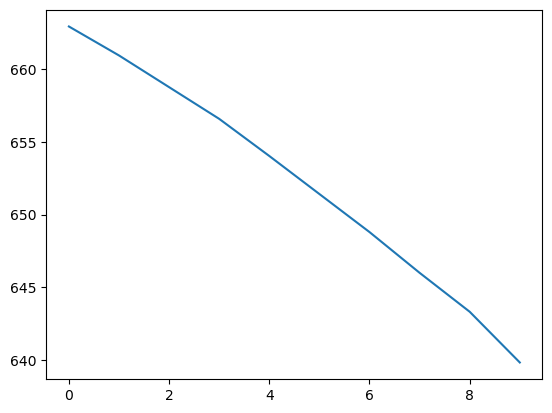

In [19]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.0001----------")
average_accuracy, c, _, _ = k_fold_cross_validation(xTrain, yTrain, k, 0.0001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)